### Preperations

Lets first import the relevant libraries and then load the data into the dataframe df

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("../data/King_County_House_prices_dataset.csv")

### Price dependency on Waterfront

First, I want to check the price dependency by the waterfront. The waterfront factor is a categorical factor (0 meaning no waterfront, 1 meaning with waterfront). 2376 values are unknown (NaN). They will not be included in the analysis. 

The mean value of the price already gives us a good hint that the waterfront has an influence on the price:

In [3]:
df.groupby('waterfront').price.mean()

waterfront
0.0    5.326420e+05
1.0    1.717215e+06
Name: price, dtype: float64

The mean price of a house with a waterfront is around three times higher. 

Now I want to now if the two distributions are equally distributed. Therefore, I will plot the two groups:

<AxesSubplot:ylabel='Frequency'>

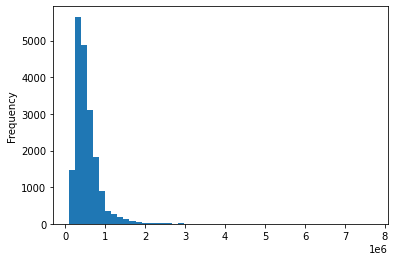

In [13]:
df.query('waterfront == 0').price.plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

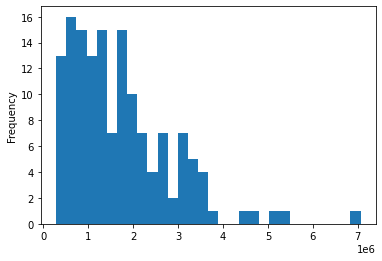

In [17]:
df.query('waterfront == 1').price.plot(kind='hist', bins=30)

Now I want to plot the price and waterfront in a scatterplot with a logarithmic axis for price.

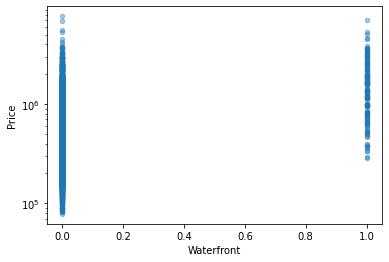

In [4]:
fig = df.plot(kind='scatter', x='waterfront', y='price', alpha=0.4)
fig.set(xlabel='Waterfront', ylabel='Price')
fig.set_yscale('log')

Here we can also see the shift in price depending on the waterfront value

Next I want to test my hypothesis using the OLS model.

In [26]:
model_waterfront = smf.ols(formula='price ~ C(waterfront)', data=df).fit().summary()
model_waterfront


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:19:57   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
C(waterfront)[T.1.0]  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
##kurzer test, kann man wieder löschen

modell = smf.ols(formula='price ~ waterfront', data=df).fit()

price = 5.326 * 10<sup>05</sup> + 1.185 * 10<sup>06</sup> * waterfront

The t-value of the coefficient and the slope seem quite high and the P>|t| quite low.

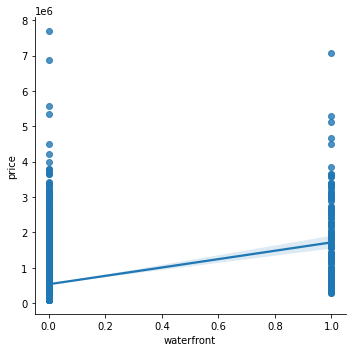

In [6]:
sns.lmplot(data=df, x='waterfront', y='price')

Interpretation: 
<p>Usually an expensive house is not described by its location at a body of water. Of course there are many expensive houses that do not have a waterfront. That is probably the reason why the R<sup>2</sup> has such a low value (0.076)

Still the graph looks odd. Two things: lets use a bar plot and lets use the price per squrefoot lliving. 

In [27]:
df['price_per_sqft_living']=df.price / df.sqft_living

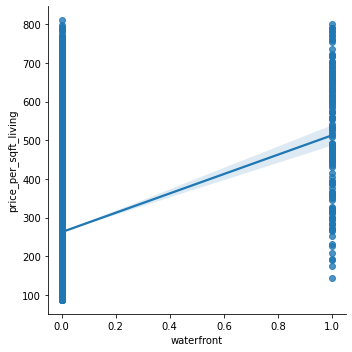

In [28]:
sns.lmplot(data=df, x='waterfront', y='price_per_sqft_living')

Lets make a bar plot!

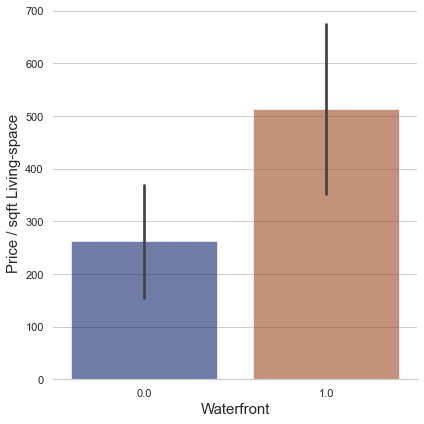

In [61]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="waterfront", y="price_per_sqft_living",
     ci='sd', palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Waterfront", "Price / sqft Living-space",fontsize=15)
#g.legend.set_title("")
#g.set_xlabel("Waterfront",fontsize=15)
#g.set_ylabel("Price / sqft Living Area",fontsize=15)
#g.tick_params(labelsize=10)
#hue="sex",

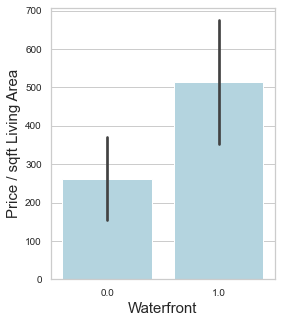

In [65]:
plt.figure(figsize=(4, 5))

# plot a bar chart
b = sns.barplot(
    x="waterfront", 
    y="price_per_sqft_living", 
    data=df, 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Waterfront",fontsize=15)
b.set_ylabel("Price / sqft Living Area",fontsize=15)
b.tick_params(labelsize=10)

What happens if we only use poor neighbourhoods?

In [58]:
df['price_per_sqft_living_wider_category'] = pd.cut(df.price_per_sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)


In [66]:
df['price_per_sqft_living_wider_category'] = pd.cut(df.price_per_sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)


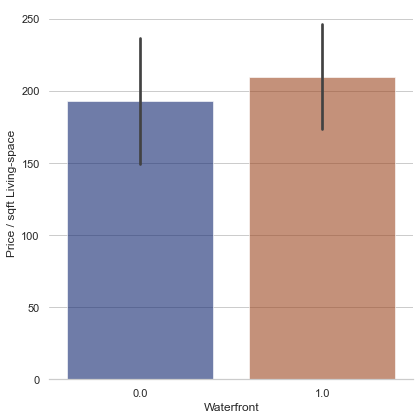

In [67]:

sns.set_theme(style="whitegrid")
df_lowerhalf= df[df['price_per_sqft_living_wider_category']==0]
g = sns.catplot(
    data=df.query('price_per_sqft_living_wider_category == 0'), kind="bar",
    x="waterfront", y="price_per_sqft_living",
     ci='sd', palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Waterfront", "Price / sqft Living-space")
#g.legend.set_title("")


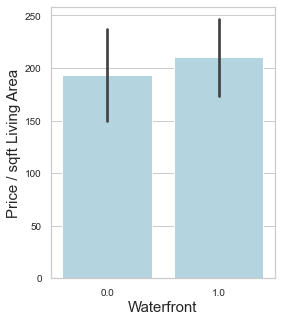

In [68]:
plt.figure(figsize=(4, 5))

# plot a bar chart
b = sns.barplot(
    x="waterfront", 
    y="price_per_sqft_living", 
    data=df.query('price_per_sqft_living_wider_category == 0'), 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Waterfront",fontsize=15)
b.set_ylabel("Price / sqft Living Area",fontsize=15)
b.tick_params(labelsize=10)

This means, that when we only look at the cheaper houses, the existence of a water front does not play a important role. 